In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Le filtre passe-bas idéal et ses approximations

## Introduction

L’étude du filtre passe-bas est importante. En effet, nous verrons que la conception de filtres passe-bas, passe-haut, passe-bande et coupe-bande se ramène à la conception d’un filtre passe-bas normalisé, auquel on applique ensuite une dénormalisation pour produire le filtre désiré. La dénormalisation peut s’opérer sur la fonction de transfert du passe-bas normalisé, ce qui donne la fonction de transfert du filtre dénormalisé requis. En plus, on peut appliquer une dénormalisation sur les éléments (R, C, etc.) du circuit d’un filtre normalisé, pour produire le circuit du filtre dénormalisé requis. Ici, on étudiera d’abord le filtre passe-bas idéal et ses caractéristiques. Ensuite, puisqu’un filtre idéal n’est pas réalisable en pratique, on étudiera certaines approximations du filtre passe-bas idéal. Nous concentrerons notre étude sur
les approximations de Butterworth, de Chebyshev et de Bessel.

## Le passe-bas idéal

La figure suivante montre (en pointillé) la caractéristique de gain d’un filtre passe-bas idéal dont la bande passante va de 0 à 1 radian par seconde. On montre aussi un exemple de caractéristique de gain d’un filtre passe-bas réalisable qui permet d’approximer le filtre idéal. Nous reviendrons plus loin aux approximations des filtres idéaux.

Text(1.25, 0.1, 'Approximation \n(Filtre réalisable)')

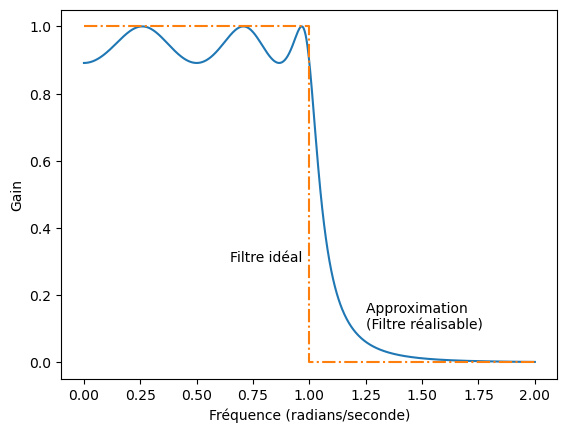

In [2]:
a1, b1 = signal.cheby1(6, 1, 1, analog=True)
w = np.linspace(0,2,1000)

w, h = signal.freqs(a1, b1, w)

plt.plot(w, np.abs(h))
plt.plot([0,1,1,2],[1,1,0,0], linestyle='-.')
plt.xlabel('Fréquence (radians/seconde)')
plt.ylabel('Gain')
plt.text(0.65, 0.3, "Filtre idéal")
plt.text(1.25, 0.1, "Approximation \n(Filtre réalisable)")

Pour cet exemple, le gain du filtre passe-bas idéal est $A=1$ dans sa bande passante, i.e. pour $\omega$ entre 0 et $\omega_c$, puis le gain est exactement 0 pour $\omega > \omega_c$. On note que le filtre idéal passe sans transition de sa bande passante à sa bande coupée. 

Un filtre idéal est aussi défini par sa caractéristique de phase. La phase d’un filtre idéal est parfaitement linéaire. Ceci implique que le délai de groupe d’un filtre idéal est constant. Rappelons que le délai de groupe se définit comme suit :

$$
D = -\frac{d\phi(\omega)}{d\omega}
$$

Notez bien le signe « - » dans cette définition. Ici, $\phi(\omega)$ est la phase de la fonction de transfert harmonique $H(j\omega)$ du filtre. Puisque  $\phi(\omega)$ est en radians et  $\omega$ est en radians par seconde, les unités du délai de groupe $D$ sont bien des secondes. Donc $D$, avec le signe « - » devant la dérivée de  $\phi(\omega)$ exprime bien un retard.

Pour un filtre idéal, dont une des caractéristiques est de présenter une phase linéaire, le délai de groupe est une constante (pente, avec un signe moins, de la caractéristique de phase). Physiquement, un délai de groupe constant dans une bande de fréquences donnée signifie que toutes les sinusoïdes dans cette bande de fréquences subissent le même retard en passant à travers le filtre. Elle se retrouvent donc en sortie avec le même décalage temporel les unes par rapport aux autres. La forme temporelle du signal formé de la somme de ces sinusoïdes reste donc inchangée. On va donc qualifier un filtre réalisable en observant de combien son délai de groupe se distingue d’une constante. Les spécifications diront, par exemple, que le délai de groupe du filtre ne doit pas s’écarter d’une valeur constante de plus de $\pm d$, où $d$ est en secondes (ou en millisecondes, ou en microsecondes, etc.).

Un filtre idéal (passe-bas ou autre) n’est pas réalisable. Puisque la fonction
de transfert $H(s)$ d’un filtre est formée du rapport de deux polynômes
d’ordre fini, il n’est pas possible de produire une caractéristique de gain
ayant la caractéristique « parfaite » de la courbe pointillée de la figure précédente.
On doit donc faire des compromis sur les spécifications pour obtenir un filtre
réalisable.

## Spécifications d’un filtre passe-bas réalisable

Le filtre idéal ne pouvant être réalisé, il faut pouvoir quantifier les
imperfections du filtre à concevoir. Plusieurs spécifications qui rendent
compte de ces imperfections ont donc été définies. Les paramètres de la
figure suivante seront utilisés pour définir les spécifications du filtre.

Text(1.07, -0.03, '$\\omega_s$')

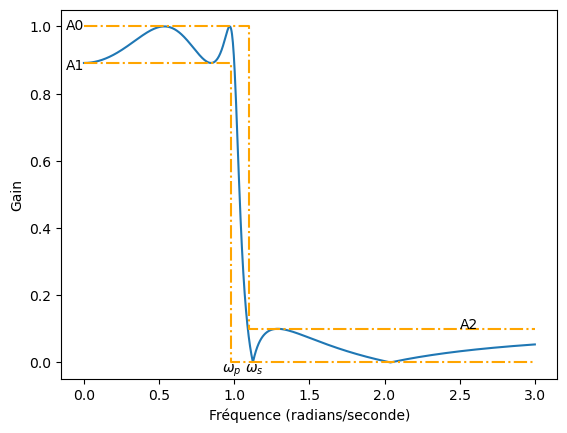

In [3]:
a1, b1 = signal.ellip(4, 1, 20, 1, analog=True)

w = np.linspace(0,3,1000)

w, h = signal.freqs(a1, b1, w)

plt.plot(w, np.abs(h))
plt.plot([0,1.1,1.1,3],[1,1,0.1,0.1], linestyle='-.', color='orange')
plt.plot([0,0.98,0.98,3],[0.89,0.89,0,0], linestyle='-.', color='orange')
plt.xlabel('Fréquence (radians/seconde)')
plt.ylabel('Gain')
plt.text(-0.12, 0.99, "A0")
plt.text(-0.12, 0.87, "A1")
plt.text(2.5, 0.1, "A2")
plt.text(0.92, -0.03, "$\omega_p$")
plt.text(1.07, -0.03, "$\omega_s$")

Dans la figure précédente, A0 et A1 sont les valeurs maximale et minimale du gain
tolérées dans la bande passante. A2 est le gain maximal toléré dans la bande
coupée. La fréquence $\omega_p$ marque la fin de la bande passante, et la fréquence
$\omega_s$ marque le début de la bande coupée. On définit aussi $\omega_c$ la fréquence de
coupure, située entre $\omega_p$ et $\omega_s$, comme la fréquence à laquelle le déphasage atteint la moitié du déphasage du filtre et où le gain du filtre est à une fraction spécifique sous le gain maximal de la bande passante
(A0). Le gain spécifique de la fréquence de coupure $\omega_c$ dépend de la famille du filtre. 
La bande de transition est définie comme l’intervalle de fréquences entre $\omega_p$ et $\omega_s$. Un exemple de caractéristique de gain d’un filtre réalisable rencontrant ces tolérances est montré sur la figure précédente (ligne continue). La forme exacte de
la courbe de gain va dépendre du filtre, notamment de son type
(Butterworth, Chebyshev, etc.) et de son ordre.

### Le ronflement ("ripple") de la bande passante

Le ronflement de bande passante (« bandpass ripple » en anglais) est la
tolérance que l’on donne pour les oscillations du gain de tension dans la
bande passante (pour les fréquences inférieures à $\omega_p$ dans la figure précédente). On
exprime le ronflement par un ratio, en dB, comme suit :

\begin{equation}
R_{dB} = 20\log_{10} \left(\frac{A_0}{A_1}\right)
\label{eq:ronflement} \tag{1}
\end{equation}

Tel que spécifié plus haut, les amplitudes $A_0$ et $A_1$ sont, respectivement, les
valeurs maximale et minimale tolérées du gain de tension dans la bande
passante. Plus le ronflement est petit, plus les oscillations de gain dans la
bande passante seront petites et meilleure sera l’approximation du filtre
idéal (dans la bande passante).

Dans le cadre du présent chapitre, nous parlons d’un filtre passe-bas
normalisé, i.e. dont la bande passante va de 0 à 1 radian par seconde
L’ajustement de la bande passante, et éventuellement la transformation du
passe-bas en un autre type de filtre, seront présentés plus loin, dans le
chapitre « Transformations fréquentielles ».

### L’atténuation de bande de réjection

Il s’agit ici de la tolérance que l’on donne pour les oscillations du gain dans
la bande coupée (pour les fréquences supérieures à $\omega_s$ dans la figure précédente).
On exprime l’atténuation de la bande de réjection, en dB, comme suit :

\begin{equation}
A_{dB} = 20\log_{10} \left(\frac{A_0}{A_2}\right)
\label{eq:attenuation} \tag{2}
\end{equation}

Ce coefficient permet d’évaluer les performances du filtre dans la bande
coupée. Un bon filtre doit avoir un coefficient $A_{dB}$ le plus grand possible.

### Le rapport de bande de transition

La bande située entre $\omega_p$ et $\omega_s$ est appelée bande de transition.
Généralement, aucune contrainte n’est donnée à la forme exacte de la
réponse en fréquence du filtre dans la bande de transition. Idéalement, cette
bande serait la plus courte possible. Pour rendre compte de la qualité du
filtre en terme de bande de transition, on définit le rapport de bande de
transition, $\omega_p / \omega_s$. Un bon filtre doit avoir un rapport de bande de transition le
plus proche possible de 1.

Notons ici que d’une manière générale, on a :

$$
\omega_p \le \omega_c < \omega_s
$$

i.e. que la fréquence de coupure $\omega_c$ du filtre se situe entre $\omega_p$ et $\omega_s$. Nous allons présenter quelques exemples
dans la prochaine section pour illustrer ceci.

## Les approximations du filtre passe-bas idéal

Trois approximations du filtre passe-bas idéal sont particulièrement
importantes :

- l’approximation de Butterworth
- l’approximation de Chebyshev
- l’approximation de Bessel

Nous allons les étudier tour à tour. Notons d’abord que, de façon générale,
les approximations de Butterworth et de Chebyshev reviennent à chercher
une fonction de transfert harmonique $H(\omega)$ telle que son module s’exprime
par


\begin{equation}
|H(\omega)|^2=\frac{1}{1+F\left(\omega^2\right)}
\label{eq:ft} \tag{3}
\end{equation}

avec la contrainte

\begin{equation}
\begin{array}{ll}
F\left(\omega^2\right)<<1 & 0<\omega<\omega_p \\
F\left(\omega^2\right)>>1 & \omega>\omega_s
\end{array}
\label{eq:ft_contrainte} \tag{4}
\end{equation}

ce qui implique que

\begin{equation}
\begin{array}{lc}
|H(\omega)|^2 \approx 1 & 0<\omega<\omega_p \\
|H(\omega)|^2 \rightarrow 0 & \omega>\omega_s
\end{array}
\label{eq:ft_amplitude} \tag{5}
\end{equation}

Le problème est donc de trouver une fonction $F(\omega^2)$ qui rencontre cette
contrainte, tout en permettant de retrouver une expression « utilisable »
pour la fonction de transfert $H(s)$ du filtre (ce sont les coefficients de cette
fonction de transfert qui sont reliés aux valeurs des composantes du circuit
correspondant).

L’approximation de Bessel, quant à elle, cherche plutôt à satisfaire une
contrainte de phase; nous verrons en effet que les filtres de Bessel ont une
phase presque linéaire, ce qui permet de minimiser la distorsion de phase
due à un délai de groupe non-constant.

### L’approximation de Butterworth

L’approximation de Butterworth, pour un filtre passe-bas normalisé d’ordre
$N$, s’écrit (pour le module)

\begin{equation}
|H(\omega)|^2=\frac{1}{1+\omega^{2 N}}
\label{eq:butterworth} \tag{6}
\end{equation}

(normalisé signifie ici que sa bande passante va de 0 à 1 radian par
seconde). En observant cette formule générale du module à l'équation \eqref{eq:ft},
l’approximation de Butterworth consiste donc à prendre

\begin{equation}
F\left(\omega^2\right)=\left(\omega^2\right)^N
\label{eq:butter_general} \tag{7}
\end{equation}

Par inspection de l'équation \eqref{eq:butterworth}, on obtient facilement que, peu importe son
ordre $N$, le gain DC du filtre Butterworth normalisé est 1 (0 dB). De plus, le
gain à la fréquence de 1 radian par seconde vaut 0.707 (- 3 dB). Donc pour
ce type de filtre, $\omega_p$, la fréquence marquant la fin de la bande passante, et
$\omega_c$, la fréquence de coupure, se confondent. Quant au gain au-delà de la
fréquence de coupure, il tend vers 0. On a bien là le comportement d’un
filtre passe-bas.

En écrivant le gain de \eqref{eq:butterworth} en dB, on obtient

\begin{equation}
| H(\omega_{dB}) | =20 \log_{10}\left(\frac{1}{\sqrt{1+\omega^{2 N}}}\right)=-20 \log_{10}\left(\sqrt{1+\omega^{2 N}}\right)
\label{eq:butter_gain} \tag{8}
\end{equation}

Lorsque $\omega >> 1$ (où « 1 » est la fréquence de coupure du filtre normalisé),
l’équation précédente devient alors

\begin{equation}
|H(\omega)| \approx-20 \log_{10}\left(\sqrt{\omega^{2 N}}\right)=-20 \log_{10}\left(\omega^N\right)=-20 N \log_{10}(\omega)
\label{eq:butter_gaincoupe} \tag{9}
\end{equation}

Autrement dit, au-delà de la fréquence de coupure, le gain du filtre
Butterworth passe-bas décroît de $20N$ dB par décade où $N$ est l’ordre du
filtre.

<a id="buttergraph"></a>
La figure suivante montre le gain du filtre Butterworth passe-bas normalisé
pour les ordres $N$ = 2, 4, 6 et 8. Notez que peu importe l’ordre du filtre, le
gain DC est toujours 1 (0 dB), et le gain à $\omega_p$, la fréquence marquant la fin
de la bande passante (ici, 1 radian par seconde), est toujours 0.707 (–3 dB).

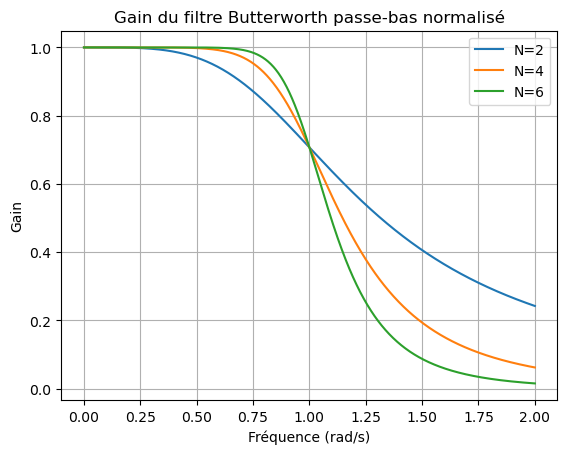

In [4]:
b1, a1 = signal.butter(2, 1, analog=True)
b2, a2 = signal.butter(4, 1, analog=True)
b3, a3 = signal.butter(6, 1, analog=True)

w = np.linspace(0,2, 1000)

w1, h1 = signal.freqs(b1, a1, w)
w2, h2 = signal.freqs(b2, a2, w)
w3, h3 = signal.freqs(b3, a3, w)

plt.plot(w1, np.abs(h1))
plt.plot(w2, np.abs(h2))
plt.plot(w3, np.abs(h3))
plt.grid()
plt.xlabel("Fréquence (rad/s)")
plt.ylabel("Gain")
plt.title("Gain du filtre Butterworth passe-bas normalisé")
plt.legend(["N=2", "N=4", "N=6"])

Afin de vérifier l’équation (9), i.e. que le gain du filtre décroît de $20N$ dB par
décade lorsque la fréquence est au-delà de la fréquence de coupure, on a
aussi tracé le gain du filtre, en dB, pour les fréquences allant de 0.01 à 10
radians par seconde. Ceci donne la figure suivante. On observe
bien qu’à $\omega$ = 10 (dix fois la fréquence de coupure), le gain du filtre d’ordre
2 vaut –40 dB, le gain du filtre d’ordre 4 vaut –80 dB et la gain du filtre
d’ordre 6 vaut –120 dB, tel que prédit par l’équation(9).

Notez aussi la caractéristique « plate » du gain du filtre Butterworth. On
pourrait montrer que les $2N-1$ premières dérivées de l’équation (6) sont
nulles à la DC, ce qui implique que la forme du gain n’a pas d’oscillations.
Cette caractéristique est propre au filtre de Butterworth et porte le nom, en
anglais, de « maximally flat ».

Ainsi, lorsque l’on désire obtenir un filtre dont le gain dans la bande
passante est le plus constant possible, on choisit en général un filtre de type
Butterworth.

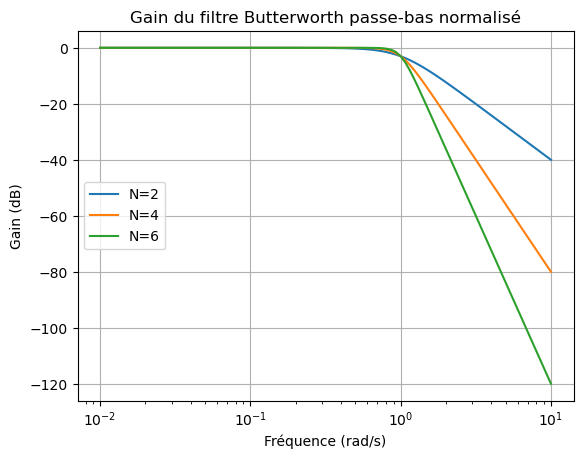

In [23]:
w = np.logspace(-2, 1, 100)

w1, h1 = signal.freqs(a1, b1, w)
w2, h2 = signal.freqs(a2, b2, w)
w3, h3 = signal.freqs(a3, b3, w)

plt.semilogx(w1, -20*np.log10(np.abs(h1)))
plt.semilogx(w2, -20*np.log10(np.abs(h2)))
plt.semilogx(w2, -20*np.log10(np.abs(h3)))
plt.grid()
plt.xlabel("Fréquence (rad/s)")
plt.ylabel("Gain (dB)")
plt.title("Gain du filtre Butterworth passe-bas normalisé")
plt.legend(["N=2", "N=4", "N=6"], loc=6)

L’expression du module de la fonction de transfert harmonique, par exemple
l’équation (6) pour le filtre de Butterworth, ne permet pas d’obtenir le
circuit pouvant réaliser le filtre en pratique. Il nous faut pour cela la fonction
de transfert $H(s)$. Comment alors obtenir cette fonction de transfert à partir
de la seule information de gain ?

Considérez le développement suivant. On écrit d’abord le module au carré
comme le produit de la fonction de transfert harmonique et de son
conjugué :
    
\begin{equation}
|H(\omega)|^2=|H(j \omega)|^2=H(j \omega) H^*(j \omega)
\label{eq:module_carre} \tag{10}
\end{equation}

où $H^*(j\omega)$ dénote le complexe conjugué de $H(j\omega)$. Notez que l’on a écrit
$H(j\omega)$ et non $H(\omega)$ pour bien illustrer que la fonction de transfert harmonique
est une fonction complexe. Mais, le complexe conjugué d’une fonction
s’obtient en remplaçant $j$ par $–j$, de sorte que

\begin{equation}
|H(j \omega)|^2=H(j \omega) H(-j \omega)
\label{eq:module_conjuge} \tag{11}
\end{equation}

Maintenant, on sait que la relation entre la fonction de transfert $H(s)$ et la
fonction de harmonique $H(j\omega)$ est

\begin{equation}
H(j \omega)= H(s) |_{s=j\omega}
\label{eq:laplace} \tag{12}
\end{equation}

On peut donc réécrire l’équation \eqref{eq:module_conjuge} comme suit :

\begin{equation}
H(s) H(-s)|_{s=j\omega}=|H(j \omega)|^2
\label{eq:module_laplace} \tag{13}
\end{equation}

ce qui revient à écrire

\begin{equation}
H(s) H(-s)=\left.|H(j \omega)|^2 \right|_{\substack{\omega^2=-s^2 \\(j \omega=s)}}
\label{eq:finale} \tag{14}
\end{equation}

(autrement dit, soit on remplace $s$ par $j\omega$ dans l’équation \eqref{eq:module_laplace} pour avoir une
équation tout en $\omega$, soit on remplace $\omega^2$ par $-s^2$ dans l’équation \eqref{eq:finale} pour
avoir une équation tout en $s$). On va donc choisir l’équation \eqref{eq:finale} pour
obtenir une équation tout en $s $dont on va tirer la fonction de transfert. Le
problème sera essentiellement « d’extraire » $H(s)$ du produit $H(s)H(-s)$ dans
une équation de la forme de l’équation \eqref{eq:finale}.

Nous allons prendre le cas précis des filtres Butterworth passe-bas
normalisés, dont le module est décrit à l’équation (6), pour bien comprendre
comment on procède. On veut obtenir ici la fonction de transfert $H(s)$ du
filtre Butterworth passe-bas normalisé.

Prenons d’abord le cas de l’ordre $N = 1$. En prenant $N=1$ et en combinant
l’équation (6) et l’équation \eqref{eq:finale}, on obtient

\begin{equation}
H(s) H(-s)= \left. |H(j \omega)|^2 \right|_{\substack{\omega^2=-s^2 \\(j \omega=s)}}=\left.\frac{1}{1+\omega^2}\right|_{\substack{\omega^2=-s^2 \\(j \omega=s)}}=\frac{1}{1-s^2}
\label{eq:laplace1} \tag{15}
\end{equation}

En factorisant le terme de droite, on obtient

\begin{equation}
H(s) H(-s)=\frac{1}{(1-s)(1+s)}=\frac{1}{(s+1)} \frac{1}{(1-s)}
\label{eq:laplace2} \tag{16}
\end{equation}

Il est facile de conclure maintenant que

\begin{equation}
H(s)=\frac{1}{s+1} \quad \text { et } \quad H(-s)=\frac{1}{1-s}
\label{eq:laplace3} \tag{17}
\end{equation}

Notez que $H(s)$ a un pôle à $s = -1$, et que $H(-s)$ a un pôle à $s=+1$. Ainsi, seul
$H(s)$ constitue une fonction de transfert stable (tous les pôles à gauche de
l’axe imaginaire dans le plan complexe). C’est le résultat recherché : $H(s)$
dans l’équation \eqref{eq:laplace3} constitue effectivement la fonction de transfert d’un
filtre Butterworth passe-bas normalisé d’ordre 1.

On peut vérifier que $H(s)$ a bien la caractéristique d’un filtre Butterworth
passe-bas (normalisé) en remplaçant $s$ par $j\omega$. En prenant le module au
carré de la fonction harmonique obtenue, on retrouve bien l’équation (6)
pour $N=1$. (Essayez pour voir.)

Prenons maintenant le cas de l’ordre $N=2$. En combinant les équations (6) et
\eqref{eq:finale} on obtient cette fois

\begin{equation}
H(s) H(-s)=\left. |H(j \omega)|^2 \right|_{\substack{\omega^2= -s^2\\(j \omega=s)}}=\left.\frac{1}{1+\left(\omega^2\right)^2}\right|_{\substack{\omega^2=-s^2 \\(j \omega=s)}}=\frac{1}{1+\left(-s^2\right)^2}=\frac{1}{1+s^4}
\label{eq:ordre2} \tag{18}
\end{equation}

Mais où sont $H(s)$ et $H(-s)$ dans cette équation ? En fait, posons-nous la
question autrement. On a vu avec l’ordre 1 que $H(s)$ est la partie de
l’équation dont les pôles sont stables (dans le plan gauche), alors que $H(-s)$
est la partie de l’équation dont les pôles sont instables (dans le plan droit).
Cherchons donc les pôles dans l’équation \eqref{eq:ordre2}, et ne retenons que les pôles
stables pour former $H(s)$.

Mais quels sont les pôles de l’équation \eqref{eq:ordre2}? Ce sont les valeurs de $s$ telles
que le dénominateur s’annule, i.e.

\begin{equation}
s^4 + 1 = 0
\label{eq:racines} \tag{19}
\end{equation}

On cherche donc $s$ tel que $s^4 = -1$. Il y a exactement 4 valeurs de $s$ qui
satisfont cette contrainte. On les appelle les 4 racines quatrièmes de –1. On
les obtient en notant que l’on peut écrire –1 comme un nombre complexe,
dont la forme la plus générale est la suivante :

\begin{equation}
-1=e^{j(\pi+2 \pi k)} \quad \text { avec } \quad k=0,1,2,3, \text { etc }
\label{eq:complexe} \tag{20}
\end{equation}

Ensuite, la racine 4ième d’un nombre s’obtient en l’élevant à la puissance ¼.
Les pôles (racines de l’équation \eqref{eq:racines}) sont donc

\begin{equation}
s=(-1)^{1 / 4}=\left(e^{j(\pi+2 \pi k)}\right)^{1 / 4}=e^{j(\pi / 4+k \pi / 2)} \quad \text { avec } \quad k=0,1,2,3, \text { etc }
\label{eq:pole} \tag{21}
\end{equation}

En remplaçant successivement $k$ par 0, 1, 2, 3, etc on obtient les racines
suivantes:

\begin{equation}
\begin{aligned}
& k=0 \quad s_0=e^{j \pi / 4} \\
& k=1 \quad s_1=e^{j 3 \pi / 4} \\
& k=2 \quad s_2=e^{j 5 \pi / 4} \\
& k=3 \quad s_3=e^{j 7 \pi / 4} \\
& k=4 \quad s_4=e^{j 9 \pi / 4}=e^{j \pi / 4}=s_0 \\
& \text{etc.}
\end{aligned}
\label{eq:poles} \tag{22}
\end{equation}

On a donc bien exactement 4 racines, puisque la 5ième ($k=4$) est égale à la
première ($k=0$) et que le tout se répète de façon cyclique à toutes les 4
valeurs de $k$.

Mais quelles sont les racines qui représentent des pôles stables ? Un bref
coup d’oeil au résultat de l’équation \eqref{eq:poles} nous apprend que

- La racine s0 est dans le premier quadrant (donc instable)
- La racine s1 est dans le deuxième quadrant (donc stable)
- La racine s2 est dans le troisième quadrant (donc stable)
- La racine s3 est dans le quatrième quadrant (donc instable)

On va donc ne retenir que les racines $s_1$ et $s_2$. On peut maintenant écrire la
fonction de transfert $H(s)$ d’ordre 2 recherchée :

\begin{equation}
\begin{aligned}
H(s)=\frac{1}{\left(s-s_1\right)\left(s-s_2\right)} & =\frac{1}{\left(s-e^{j 3 \pi / 4}\right)\left(s-e^{j 5 \pi / 4}\right)} \\
& =\frac{1}{\left(s-e^{j 3 \pi / 4}\right)\left(s-e^{-j 3 \pi / 4}\right)} \\
& =\frac{1}{s^2-\left[e^{j 3 \pi / 4}+e^{-j 3 \pi / 4}\right] s+1} \\
& =\frac{1}{s^2-2 \cos (3 \pi / 4) s+1} \\
& =\frac{1}{s^2-2\left(-\frac{\sqrt{2}}{2}\right) s+1} \\
& =\frac{1}{s^2+1.4141 s+1}
\end{aligned}
\label{eq:ft_N2} \tag{23}
\end{equation}

Voilà la fonction de transfert $H(s)$ d’un filtre Butterworth passe-bas
normalisé d’ordre 2. Pour nous assurer que la caractéristique de gain
obtenue est bien celle d’un Butterworth passe-bas normalisé d’ordre 2,
faisons un petit exercice Python. Nous allons tracer la fonction de l’équation
(6) pour $N=2$, et nous allons la comparer avec le gain de la fonction de
transfert harmonique obtenue en remplaçant $s$ par $j\omega$ dans l’équation \eqref{eq:ft_N2}.

Le code Python est montré ci-dessous, suivi des courbes de gain obtenues.
On a pris un incrément de fréquences de 0.01 sur l’échelle $\omega$ qui va de 0 à 2 radians par seconde.

```Python
w = np.linspace(0, 2, 200)   # 200 points entre 0 et 2
s = 1j * w                   # Variable s (Laplace)

M = 1/(np.sqrt(1+w**4))      # Module selon l'équation 6

H = 1/(s**2 + 1.4141*s +1)   # H(s) selon l'équation 23


fig = plt.figure()
fig.set_figwidth(10)
ax1 = plt.subplot(1,2,1)
ax1.plot(w, M)
ax1.grid()
ax1.set_xlabel("w (rad/s)")
ax1.set_ylabel("Module")

ax2 = plt.subplot(1,2,2)
ax2.plot(w, np.abs(H))
ax2.grid()
ax2.set_xlabel("w (rad/s)")
ax2.set_ylabel("Module")
```

Text(0, 0.5, 'Module')

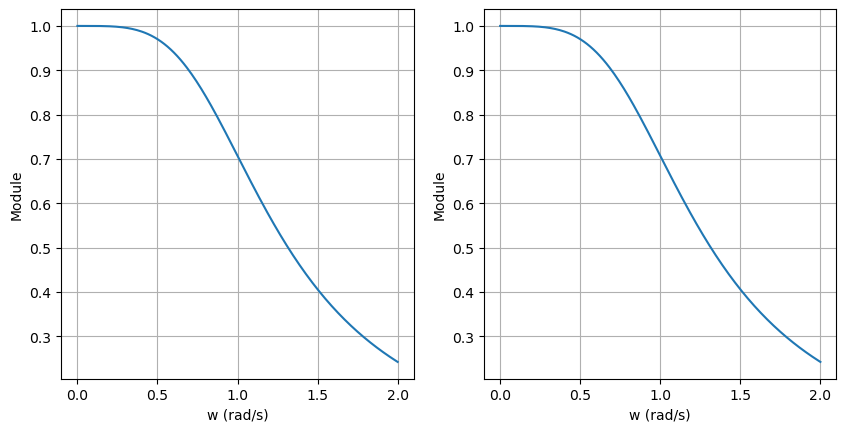

In [6]:
w = np.linspace(0, 2, 200)  #200 points entre 0 et 2
s = 1j * w                   #Variable s (Laplace)

M = 1/(np.sqrt(1+w**4))      # Module selon l'équation 6

H = 1/(s**2 + 1.4141*s +1)   # H(s) selon l'équation 23


fig = plt.figure()
fig.set_figwidth(10)
ax1 = plt.subplot(1,2,1)
ax1.plot(w, M)
ax1.grid()
ax1.set_xlabel("w (rad/s)")
ax1.set_ylabel("Module")

ax2 = plt.subplot(1,2,2)
ax2.plot(w, np.abs(H))
ax2.grid()
ax2.set_xlabel("w (rad/s)")
ax2.set_ylabel("Module")

On note que les deux figures obtenues sont strictement identiques. La
fonction de transfert $H(s)$ obtenue pour l’ordre 2 a donc la bonne
caractéristique de gain.

Il est maintenant instructif de considérer le cas général, i.e. de déterminer
quels sont les pôles du filtre Butterworth passe-bas normalisé d’ordre $N$ pour
$N$ quelconque. On a deux cas de figure, soit le cas $N$ pair et le cas $N$ impair.

Dans le cas où $N$ est pair, on écrit

\begin{equation}
H(s) H(-s)=\left.\frac{1}{1+\left(\omega^2\right)^N}\right|_{\substack{\omega^2=-s^2 \\(j \omega=s)}}=\frac{1}{1+\left(-s^2\right)^N}=\frac{1}{1+s^{2 N}}
\label{eq:butter_pair} \tag{24}
\end{equation}

et dans le cas où $N$ est impair, on écrit

\begin{equation}
H(s) H(-s)=\left.\frac{1}{1+\left(\omega^2\right)^N}\right|_{\substack{\omega^2=-s^2 \\(j \omega=s)}}=\frac{1}{1+\left(-s^2\right)^N}=\frac{1}{1-s^{2 N}}
\label{eq:butter_impair} \tag{25}
\end{equation}

(la différence est simplement le signe au dénominateur, qui reste « + »
quand $N$ est pair et qui devient « - » quand $N$ est impair.)
Ainsi, les pôles de la fonction de transfert $H(s)$ doivent satisfaire la condition
suivante :

\begin{equation}
\begin{aligned}
& s^{2 N}=-1 \quad \text { lorsque } N \text { est pair } \\
& s^{2 N}=1 \quad \text { lorsque } N \text { est impair } \\
&
\end{aligned}
\label{eq:buttergeneral} \tag{26}
\end{equation}

Dans le cas où $N$ est pair, on cherche donc les $2N$ racines de –1, et dans le
cas où $N$ est impair, on cherche les $2N$ racines de 1. En généralisant à ces
deux conditions le processus des équations (20) à (22), on obtient
l’expression suivante pour les pôles du filtre Butterworth passe-bas
normalisé d’ordre $N$ (souvenez-vous que l’on ne retient que les racines
stables de l’équation \eqref{eq:buttergeneral}):

\begin{equation}
p_k=e^{j \theta_k} \quad \text { où } \quad \theta_k=\frac{\pi}{2}+\frac{(2 k+1) \pi}{2 N} \quad k=0,1,2, \ldots, N-1
\label{eq:butterpoles} \tag{27}
\end{equation}

On peut maintenant afficher les pôles du filtre de Butterworth passe-bas
normalisé d’ordre $N$. La figure suivante montre ces pôles pour $N = 1, 2, 3, 4,
5 \text{ et } 6$ respectivement. On affiche à la fois les pôles de $H(s)$ – dans le plan
gauche – et les racines de $H(-s)$ – dans le plan droit. On a affiché l’axe
imaginaire (en pointillé) pour mettre évidence les pôles stable (à gauche de
l’axe) qui seront retenus dans la fonction de transfert $H(s)$.

On observe la chose suivante : les pôles du filtre de Butterworth passe-bas
normalisé sont situés sur un cercle de rayon 1, dans le demi-plan complexe
gauche. Ils sont régulièrement espacés, i.e. que la distance angulaire entre
deux pôles successifs est toujours la même.

Text(0.5, 1.0, 'N=6')

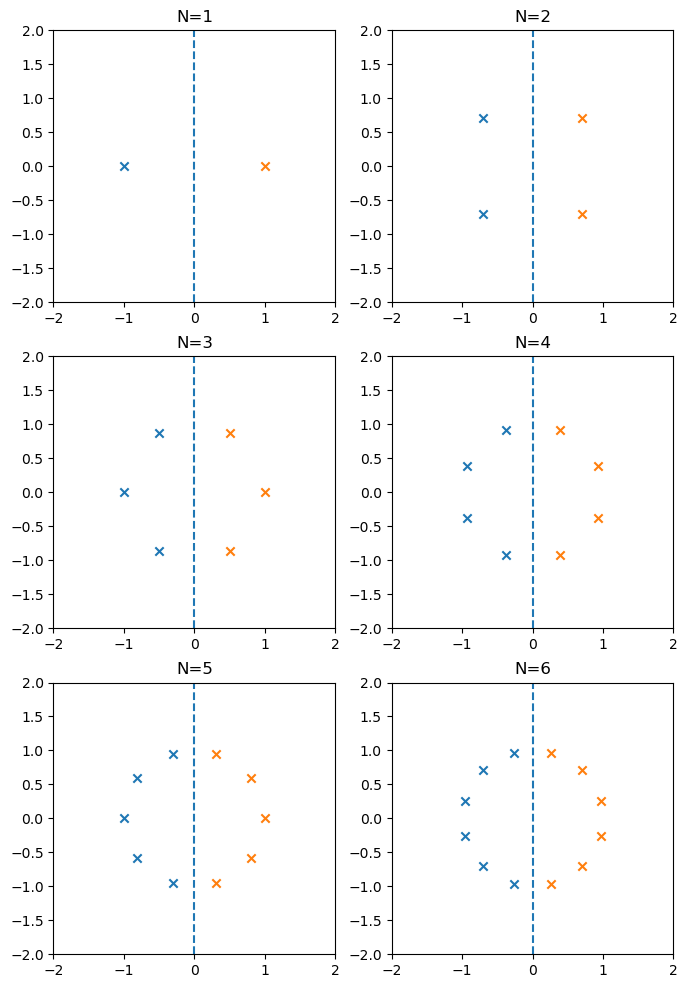

In [7]:
def pole_angles(N):
    poles = np.zeros(N)
    for k in range(N):
        poles[k] = np.pi/2 + ((2*k+1)*np.pi)/(2*N)
    return poles

p1 = np.exp(1j*pole_angles(1))
p2 = np.exp(1j*pole_angles(2))
p3 = np.exp(1j*pole_angles(3))
p4 = np.exp(1j*pole_angles(4))
p5 = np.exp(1j*pole_angles(5))
p6 = np.exp(1j*pole_angles(6))

fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(12)

ax1 = plt.subplot(3,2,1)
ax1.scatter(np.real(p1), np.imag(p1), marker='x')
ax1.scatter(-np.real(p1), np.imag(p1), marker='x')
ax1.axis([-2, 2, -2, 2])
ax1.axvline(linestyle='--')
ax1.set_title('N=1')

ax2 = plt.subplot(3,2,2)
ax2.scatter(np.real(p2), np.imag(p2), marker='x')
ax2.scatter(-np.real(p2), np.imag(p2), marker='x')
ax2.axis([-2, 2, -2, 2])
ax2.axvline(linestyle='--')
ax2.set_title('N=2')

ax3 = plt.subplot(3,2,3)
ax3.scatter(np.real(p3), np.imag(p3), marker='x')
ax3.scatter(-np.real(p3), np.imag(p3), marker='x')
ax3.axis([-2, 2, -2, 2])
ax3.axvline(linestyle='--')
ax3.set_title('N=3')

ax4 = plt.subplot(3,2,4)
ax4.scatter(np.real(p4), np.imag(p4), marker='x')
ax4.scatter(-np.real(p4), np.imag(p4), marker='x')
ax4.axis([-2, 2, -2, 2])
ax4.axvline(linestyle='--')
ax4.set_title('N=4')

ax5 = plt.subplot(3,2,5)
ax5.scatter(np.real(p5), np.imag(p5), marker='x')
ax5.scatter(-np.real(p5), np.imag(p5), marker='x')
ax5.axis([-2, 2, -2, 2])
ax5.axvline(linestyle='--')
ax5.set_title('N=5')

ax6 = plt.subplot(3,2,6)
ax6.scatter(np.real(p6), np.imag(p6), marker='x')
ax6.scatter(-np.real(p6), np.imag(p6), marker='x')
ax6.axis([-2, 2, -2, 2])
ax6.axvline(linestyle='--')
ax6.set_title('N=6')

En connaissant la position et la valeur des pôles de $H(s)$, on peut maintenant
retrouver les coefficients de la fonction de transfert comme on l’a fait pour
l’ordre $N = 1$ (de façon triviale) à l’équation (17), et pour l’ordre $N=2$ à
l’équation (23). Sans refaire tout ce développement à la main, on peut
utiliser la table suivante (pour les ordres 1 à 8), qui donne les coefficients du
filtre Butterworth passe-bas normalisé d’ordre $N$ pour la fonction de transfert
de forme générale suivante :

\begin{equation}
H(s)=\frac{1}{a_N s^N+a_{N-1} s^{N-1}+\ldots+a_1 s+1}
\label{eq:forme_generale} \tag{28}
\end{equation}

|  <div style="width:20px">$N$</div> | <div style="width:40px">$a_8$</div> | <div style="width:40px">$a_7$</div> | <div style="width:40px">$a_6$</div> | <div style="width:40px">$a_5$</div> |<div style="width:40px">$a_4$</div> | <div style="width:40px">$a_3$</div> | <div style="width:40px">$a_2$</div> | <div style="width:40px">$a_1$</div> |
| --- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- |
| 1 |  |  |  |  |  |  |  | 1 |
| 2 |  |  |  |  |  |  | 1 | 1.4141 |
| 3 |  |  |  |  |  | 1 | 2 | 2 |
| 4 |  |  |  |  | 1 | 2.6131 | 3.4142 | 2.6131 |
| 5 |  |  |  | 1 | 3.2361 | 5.2361 | 5.2361 | 3.2361 |
| 6 |  |  | 1 | 3.8637 | 7.4641 | 9.1416 | 7.4641 | 3.8637 |
| 7 |  | 1 | 4.4940 | 10.0978 | 14.5918 | 14.5918 | 10.0978 | 4.4940 |
| 8 | 1 | 5.1258 | 13.1371 | 21.8462 | 25.6884 | 21.8462 | 13.1371 | 1 |


Notez que l’on peut obtenir ces mêmes coefficients avec la librairie `scipy` de Python, qui fournit
une série de fonctions pour la conception de filtres analogiques. On obtient
alors les coefficients de la fonction de transfert du filtre (`scipy` ne donne
pas de structure de circuits…).

Pour le filtre de Butterworth, on utilise la commande [`scipy.signal.butter`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html) dont la
syntaxe est la suivante :

```python
import scipy.signal as signal
b, a = signal.butter(N, wc, analog=True)
```

où `N` est l’ordre du filtre, `wc` est la fréquence de coupure en radians par
seconde (ici `wc = 1` pour le filtre normalisé) et `analog=True` signifie que l’on veut les
coefficients de la fonction de transfert $H(s)$ d’un filtre analogique. La fonction
retourne les coefficients du numérateur de $H(s)$ dans `b`, et les coefficients du
dénominateur dans `a`. `scipy` pourrait aussi faire la conception d’un filtre
numérique (on ne met pas le `analog=True`), mais ça c’est une autre histoire… Vous y
reviendrez dans une session ultérieure…

Par exemple, pour obtenir les coefficients de la fonction de transfert d’un
filtre Butterworth passe-bas normalisé d’ordre `N=2` avec `scipy`, on fait
comme suit :

```python
b, a = signal.butter(2,1,analog=True)
```

`b = [1.]`

`a = [1.   1.41421356   1.  ]`

In [8]:
b, a = signal.butter(2,1,analog=True)
print('b = ', b)
print('a = ', a)

b =  [1.]
a =  [1.         1.41421356 1.        ]


On obtient bien les mêmes coefficients que la ligne $N=2$ du tableau des coefficients de butterworth. 
Le plus important est de noter que seul le dernier coefficient de `b` est non nul,
et égal à 1 (le numérateur de la fonction de transfert du filtre). `scipy` est
capable de faire la conception de bien d’autres filtres. Nous y reviendrons
dans un prochain chapitre.

Pour conclure cette section sur les filtres Butterworth passe-bas normalisés,
démontrons avec Python que les courbes de gain de la fonction de transfert
de l’équation (28), pour les ordre 2, 4 et 6, sont les mêmes que celles
obtenues au début de ce document. 

```python
b1, a1 = signal.butter(2, 1, analog=True)
b2, a2 = signal.butter(4, 1, analog=True)
b3, a3 = signal.butter(6, 1, analog=True)

w = np.linspace(0,2, 1000)

w1, h1 = signal.freqs(b1, a1, w)
w2, h2 = signal.freqs(b2, a2, w)
w3, h3 = signal.freqs(b3, a3, w)

plt.plot(w1, np.abs(h1))
plt.plot(w2, np.abs(h2))
plt.plot(w3, np.abs(h3))
plt.grid()
plt.xlabel("Fréquance (rad/s)")
plt.ylabel("Gain")
plt.title("Gain du filtre Butterworth passe-bas normalisé")
plt.legend(["N=2", "N=4", "N=6"])
```

On obtient alors la figure suivante, que l’on peut comparer avec la première
figure (les deux figures sont identiques). On obtient donc
bien des fonctions de transfert $H(s)$ dont le module est donné par
l’approximation de Butterworth de l’équation (6).

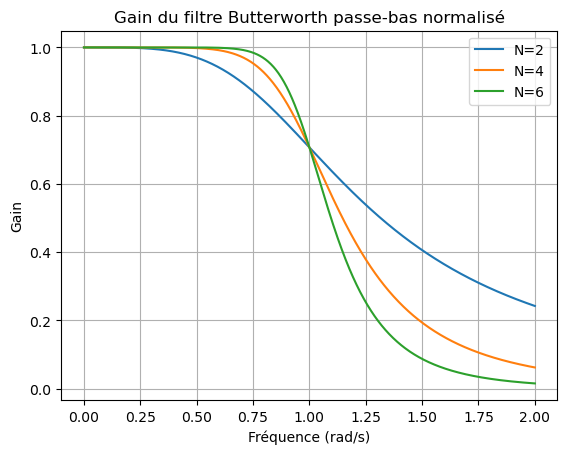

In [20]:
b1, a1 = signal.butter(2, 1, analog=True)
b2, a2 = signal.butter(4, 1, analog=True)
b3, a3 = signal.butter(6, 1, analog=True)

w = np.linspace(0,2, 1000)

w1, h1 = signal.freqs(b1, a1, w)
w2, h2 = signal.freqs(b2, a2, w)
w3, h3 = signal.freqs(b3, a3, w)

plt.plot(w1, np.abs(h1))
plt.plot(w2, np.abs(h2))
plt.plot(w3, np.abs(h3))
plt.grid()
plt.xlabel("Fréquence (rad/s)")
plt.ylabel("Gain")
plt.title("Gain du filtre Butterworth passe-bas normalisé")
plt.legend(["N=2", "N=4", "N=6"])

Nous reviendrons plus loin à la phase et à la réponse transitoire du filtre de
Butterworth passe-bas, mais avant nous allons étudier une deuxième
approximation du passe-bas idéal : celle de Chebyshev.

### L’approximation de Chebyshev

Comme on l’a vu dans la section précédente, [l’approximation de Butterworth](#buttergraph)
est assez bonne pour les fréquences près de 0 (le gain du filtre est 1 et la
réponse est plate), et pour les fréquences élevées (le gain du filtre tend vers
zéro assez rapidement). Par contre, près de $\omega_p$, la fréquence marquant la fin
de la bande passante, (ici, 1 radian par seconde), l’approximation est assez
mauvaise. Autrement dit la bande de transition d’un filtre de Butterworth
est assez large. Idéalement, on voudrait un filtre qui respecte les tolérances
de la bande passante et de la bande coupée, mais qui coupe plus rapidement
à la transition. Les filtres de Chebyshev se rapprochent davantage de ce
comportement.

L’approximation de Chebyshev s’écrit comme suit (pour le module) :

\begin{equation}
|H(j \omega)|=\frac{1}{\sqrt{1+\alpha^2 C_N^2(\omega)}}
\label{eq:module_cheby} \tag{29}
\end{equation}

où $\alpha$ est une constante (pas en dB) et $C_N(\omega)$ est le polynôme de Chebyshev
(du premier type) de degré $N$, définit comme suit :

\begin{equation}
C_N(\omega)=\cos (N \arccos (\omega))
\label{eq:poly_cheby} \tag{30}
\end{equation}

$N$ sera aussi l’ordre du filtre de Chebyshev.
En observant l’équation \eqref{eq:poly_cheby}, on voit que l’on peut obtenir facilement les
polynômes de Chebyshev pour $N = 0$ et $N = 1$. On a

\begin{equation}
\begin{aligned}
& C_0(\omega)=\cos (0)=1 \\
& C_1(\omega)=\cos (\arccos (\omega))=\omega
\end{aligned}
\label{eq:poly_n0n1} \tag{31}
\end{equation}

Pour obtenir les polynômes de Chebyshev d’ordre supérieur, et pour bien
voir que $C_N(\omega)$ est un polynôme d’ordre $N$, faisons la substitution suivante :

\begin{equation}
\omega=\cos (\theta)
\label{eq:subs} \tag{32}
\end{equation}

ce qui implique dans l’équation \eqref{eq:poly_cheby} que

\begin{equation}
C_N(\omega)=\cos (N \theta)
\label{eq:subs2} \tag{33}
\end{equation}

En appliquant l’identité trigonométrique pour le cosinus d’une somme, on
peut écrire les deux équations suivantes :

\begin{equation}
\begin{aligned}
& C_{N+1}(\omega)=\cos ((N+1) \theta)=\cos (N \theta) \cos (\theta)-\sin (N \theta) \sin (\theta) \\
& C_{N-1}(\omega)=\cos ((N-1) \theta)=\cos (N \theta) \cos (\theta)+\sin (N \theta) \sin (\theta)
\end{aligned}
\label{eq:subs3} \tag{34}
\end{equation}

En faisant la somme de ces deux équations, et en utilisant les définitions des
équations \eqref{eq:subs} et \eqref{eq:subs2}, on obtient alors

\begin{equation}
C_{N+1}(\omega)+C_{N-1}(\omega)=2 \cos (N \theta) \cos (\theta)=2 \omega C_N(\omega)
\label{eq:subs4} \tag{35}
\end{equation}

Ceci définit la règle de récursivité suivante :

\begin{equation}
C_{N+1}(\omega)=2 \omega C_N(\omega)-C_{N-1}(\omega)
\label{eq:rec1} \tag{36}
\end{equation}

ce que l’on peut aussi écrire

\begin{equation}
C_N(\omega)=2 \omega C_{N-1}(\omega)-C_{N-2}(\omega)
\label{eq:rec2} \tag{37}
\end{equation}

Puisque l’on a déjà défini $C_0(\omega)$ et $C_1(\omega)$ à l’équation \eqref{eq:poly_n0n1}, on peut
maintenant donner par récursivité tous les polynômes de Chebyshev d’ordre
$N=2, 3, 4,$ etc. Par exemple, le polynôme de Chebyshev d’ordre 2 s’obtient
comme suit :

\begin{equation}
C_2(\omega)=2 \omega C_1(\omega)-C_0(\omega)=2 \omega \omega-1=2 \omega^2-1
\label{eq:poly2} \tag{38}
\end{equation}

\begin{equation}
C_3(\omega)=2 \omega C_2(\omega)-C_1(\omega)=2 \omega\left(2 \omega^2-1\right)-\omega=4 \omega^3-3 \omega
\label{eq:poly3} \tag{39}
\end{equation}

et ainsi de suite jusqu’à obtenir le polynôme de Chebyshev d’ordre voulu. Le
tableau suivant donne les 8 premiers polynômes de Chebyshev.

| <div style="width:60px">$N$</div> | <div style="width:400px">$C_N (\omega)$</div> |
|---|---|
| 0 | 1 |
| 1 | $\omega$ |
| 2 | $2\omega^2 -1 $ |
| 3 | $4\omega^3 -3\omega $ |
| 4 | $8\omega^4 -8\omega^2 + 1 $ |
| 5 | $16\omega^5 - 20\omega^3 + 5\omega $ |
| 6 | $32\omega^6 - 48\omega^4 + 18\omega^2 - 1 $ |
| 7 | $64\omega^7 - 112\omega^5 + 56\omega^3 - 7\omega $ |
| 8 | $128\omega^8 - 256\omega^6 + 160\omega^4 - 32\omega^2 +1 $ |

Voyons maintenant la forme du module du filtre passe-bas de Cheyshev en
appliquant ces polynômes dans l’équation \eqref{eq:module_cheby} pour les ordres $N = 2$ et $N = 4$. On va prendre pour l’instant $\alpha = 1$, mais nous reviendrons plus loin sur
l’effet de ce paramètre.

Pour l’ordre 2, le module du filtre de Chebyshev passe-bas (selon l’équation
\eqref{eq:module_cheby} et le polynôme d’ordre $N=2$ dans le tableau précédent) est donné par

\begin{equation}
|H(j \omega)|=\frac{1}{\sqrt{1+\left(2 \omega^2-1\right)^2}}
\label{eq:chebyN2} \tag{40}
\end{equation}

alors que pour l’ordre 4 on obtient

\begin{equation}
|H(j \omega)|=\frac{1}{\sqrt{1+\left(8 \omega^4-8 \omega^2+1\right)^2}}
\label{eq:chebyN4} \tag{41}
\end{equation}

Avec Python, on calcule aisément ces fonctions, pour les afficher ensuite.
Le code est donné ci-dessous, suivi des figures obtenues. Notez que l’on a
pris une échelle de fréquences entre 0 et 2 (radians par seconde) pour
afficher les courbes de gain de ces filtres normalisés, i.e. dont la bande
passante va de 0 à 1 radian par seconde.

```python
w = np.linspace(0, 2, 200)      # Vecteur de fréquence

C2 = 2 * w**2 - 1               # Polynome C2(w)
C4 = 8 * w**4 - 8 * w**2 + 1    # Polynome C4(w)

H2 = 1 / (np.sqrt(1 + C2**2))   # Gain du filtre pour N=2
H4 = 1 / (np.sqrt(1 + C4**2))   # Gain du filtre pour N=4

plt.plot(w, H2)
plt.plot(w, H4)
plt.xlabel("w (rad/s")
plt.title("Module du filtre Chebyshev passe-bas normalisé d\'ordre N")
plt.legend(['N=2', 'N=4'])
```

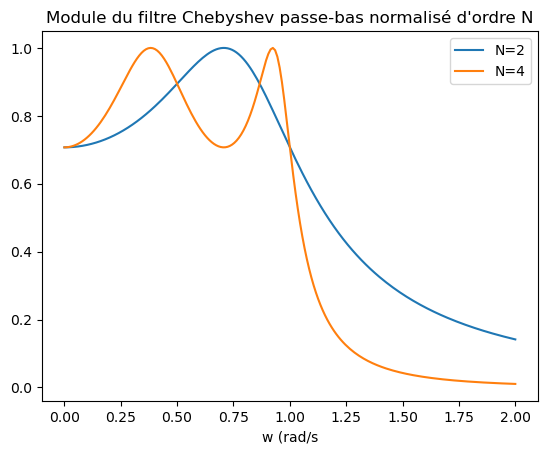

In [10]:
w = np.linspace(0, 2, 200)      # Vecteur de fréquence

C2 = 2 * w**2 - 1               # Polynome C2(w)
C4 = 8 * w**4 - 8 * w**2 + 1    # Polynome C4(w)

H2 = 1 / (np.sqrt(1 + C2**2))   # Gain du filtre pour N=2
H4 = 1 / (np.sqrt(1 + C4**2))   # Gain du filtre pour N=4

plt.plot(w, H2)
plt.plot(w, H4)
plt.xlabel("w (rad/s")
plt.title("Module du filtre Chebyshev passe-bas normalisé d\'ordre N")
plt.legend(['N=2', 'N=4'])

On observe que le module de la réponse en fréquence du filtre de Chebyshev
présente des oscillations dans la bande passante, mais pas dans la bande
coupée. De plus, les bandes de transition sont plus étroites que celles des
filtres de Butterworth. Comparez par exemple la courbe d’ordre $N=4$ avec [le
filtre Butterworth d’ordre](#buttergraph) $N=6$. La
justesse de l’approximation de Chebyshev est, sous cet aspect, bien
meilleure que l’approximation de Butterworth.

Mais comment contrôler ces oscillations du module dans la bande passante ?
C’est le rôle du coefficient $\alpha$ dans l’équation (29). Pour voir cela, reprenons
l’exemple à l’ordre $N=4$ mais en faisant varier ce coefficient $\alpha$. On va
prendre successivement $\alpha = 1$, $\alpha = 0.5$ et $\alpha = 0.1$. Ceci donne les trois
fonctions suivantes pour le module du filtre :

\begin{equation}
\begin{array}{ll}
|H(j \omega)|=\frac{1}{\sqrt{1+\left(8 \omega^4-8 \omega^2+1\right)^2}} & \text { pour } \alpha=1 \\
|H(j \omega)|=\frac{1}{\sqrt{1+0.5^2\left(8 \omega^4-8 \omega^2+1\right)^2}} & \text { pour } \alpha=0.5 \\
|H(j \omega)|=\frac{1}{\sqrt{1+0.1^2\left(8 \omega^4-8 \omega^2+1\right)^2}} & \text { pour } \alpha=0.1
\end{array}
\label{eq:ronflement} \tag{41}
\end{equation}

Avec Python, comparons maintenant ces trois filtres.

```python
w = np.linspace(0, 2, 200)

C4 = 8 * w**4 - 8 * w**2 + 1

H4_10 = 1 / (np.sqrt(1 + C4**2))
H4_05 = 1 / (np.sqrt(1 + 0.5**2 * C4**2))
H4_01 = 1 / (np.sqrt(1 + 0.1**2 * C4**2))

plt.plot(w, H4_10)
plt.plot(w, H4_05)
plt.plot(w, H4_01)
plt.legend(['α = 1' , 'α = 0.5', 'α = 0.1'])
plt.title("Effet du coefficient α")
plt.xlabel('w (rad/s)')
plt.ylabel('Gain')
```

La figure obtenue est la suivante. On observe que le ronflement (les
oscillations) de la bande passante diminue à mesure que le coefficient $\alpha$
diminue. Cependant, au même moment la bande de transition s’élargit. Il
n’est donc pas possible, pour un ordre donné, de diminuer en même temps
le ronflement de la bande passante et la largeur de la bande de transition. Il
y aura toujours un compromis à faire. Observez cependant que les
oscillations dans la bande passante sont d’amplitude constante. Plus
précisément, le gain du filtre passe par un maximum de 1, et par un
minimum qui dépend de la valeur du coefficient $\alpha$.


Text(0, 0.5, 'Gain')

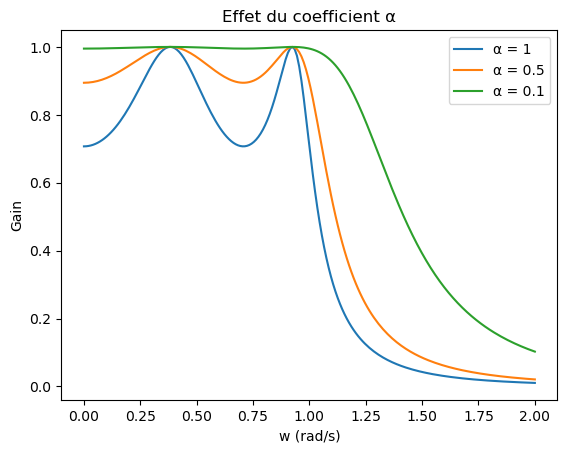

In [11]:
w = np.linspace(0, 2, 200)

C4 = 8 * w**4 - 8 * w**2 + 1

H4_10 = 1 / (np.sqrt(1 + C4**2))
H4_05 = 1 / (np.sqrt(1 + 0.5**2 * C4**2))
H4_01 = 1 / (np.sqrt(1 + 0.1**2 * C4**2))

plt.plot(w, H4_10)
plt.plot(w, H4_05)
plt.plot(w, H4_01)
plt.legend(['α = 1' , 'α = 0.5', 'α = 0.1'])
plt.title("Effet du coefficient α")
plt.xlabel('w (rad/s)')
plt.ylabel('Gain')

Mais comment choisir ce coefficient $\alpha$ ? En fait, on peut montrer que
l’amplitude maximale du ronflement, i.e. le rapport de l’équation (1), est
défini en dB par

\begin{equation}
R_{d B}=20 \log _{10}\left(\sqrt{1+\alpha^2}\right)=10 \log _{10}\left(1+\alpha^2\right)
\label{eq:ronfDB} \tag{42}
\end{equation}

Ainsi, pour maintenir le ronflement de la bande passante à une valeur $R$ en
dB, on doit fixer le coefficient $\alpha$ comme suit :

\begin{equation}
\alpha = \sqrt{10^{R/10}-1}
\label{eq:ronfDB2} \tag{43}
\end{equation}

Par exemple, pour maintenir le ronflement à 1 dB, on doit donner au
coefficient $\alpha$ la valeur

\begin{equation}
\alpha = \sqrt{10^{1/10}-1} = 0.5088
\label{eq:ronf1DB} \tag{43}
\end{equation}

(ce qui est proche de la valeur de 0.5 choisie dans l’exemple plus haut). Le
gain dans la bande passante oscillera alors entre sa valeur maximale de 1 (0
dB) et 0.89 (-1 dB). C’est effectivement ce que nous observons dans la
courbe du milieu de la figure ci-dessus, qui correspond à la valeur $\alpha = 0.5$.

On devine déjà qu’il faudra choisir un ordre de filtre $N$ suffisant afin de
maintenir le ronflement sous une certaine valeur et d’imposer en plus une
atténuation minimale dans la bande coupée à une fréquence donnée.

Comme pour les filtres de Butterworth, il nous faut la fonction de transfert
$H(s)$ du filtre de Chebyshev afin de pouvoir construire un circuit présentant
les bonnes caractéristiques. Cependant, avec les filtres de Chebyshev,
plusieurs (une infinité) de fonctions de transfert normalisées sont possibles
selon le ronflement maximum imposé dans la bande passante. Rappelons
que le ronflement est directement lié à la valeur du coefficient $\alpha$ dans
l’équation (29). Ainsi, on retrouve en général des tables de coefficients
comme on l’a fait pour le filtre de Butterworth jusqu’à l’ordre 8, mais en
donnant plusieurs tables pour différentes valeurs du coefficient $\alpha$.

Heureusement, il y a des outils de conception pour nous aider.

La fonction [scipy.signal.cheby1](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cheby1.html) de `scipy` permet de calculer les coefficients de la
fonction de transfert d’un filtre analogique de Chebyshev d’ordre $N$, pour
lequel on spécifie le ronflement et $\omega_p$, la fréquence marquant la fin de la
bande passante. Faisons un exemple pour voir comment on l’utilise.

D’abord, notons que de façon générale, la fonction de transfert $H(s)$ du filtre
de Chebyshev passe-bas d’ordre $N$ a la forme suivante

\begin{equation}
H(s) = \frac{K}{V_N(s)}
\label{eq:ftgencheby} \tag{45}
\end{equation}

où

\begin{equation}
V_N(s) = s^N + b_{N-1}s^{N-1} + b_{N-2}s^{N-2} + \ldots + b_1 s + b_0
\label{eq:ftgencheby_denum} \tag{46}
\end{equation}

et

\begin{equation}
\begin{array}{ll}
K=b_0 & \text { pour } N \text { impair } \\
K=b_0 \sqrt{\frac{1}{1+\alpha^2}} & \text { pour } N \text { pair }
\end{array}
\label{eq:ftgencheby_gain} \tag{46}
\end{equation}

avec $\alpha$ tel que définit dans l’équation (29). La contrainte de l’équation \eqref{eq:ftgencheby_gain}
assure que le gain du filtre atteint au maximum 0 dB dans la bande
passante. En effet, pour les ordres $N$ impairs, le gain du filtre vaut 0 dB à la
DC, mais pour les ordres $N$ pairs, le gain du filtre à la DC est égal au gain
minimal permis par le ronflement dans la bande passante. Mais faisons un
exemple pour voir cela.

On demande de déterminer la fonction de transfert $H(s)$ d’un filtre
Chebyshev passe-bas, pour les ordres $N=2$ et $N=3$, avec la contrainte que le
ronflement dans la bande $\omega = [0, 1] $ rad/sec ne dépasse pas 0.5 dB.

La syntaxe de la fonction [scipy.signal.cheby1](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cheby1.html) est la suivante :

`b, a = signal.cheby1(N, rp, Wn, analog=True)`

où

- `N` est l'ordre du filtre
- `R` est le ronflement dans la bande passante (en dB)
- `Wn` est la fréquence de coupure
- `analog=True` signifie que l’on veut un filtre analogique

Voici le code Python

```python
b1, a1 = signal.cheby1(2, 0.5, 1, analog=True)
b2, a2 = signal.cheby1(3, 0.5, 1, analog=True)

w1, h1 = signal.freqs(b1, a1, w)
w2, h2 = signal.freqs(b2, a2, w)

plt.plot(w1, np.abs(h1))
plt.plot(w2, np.abs(h2))
plt.grid()
plt.legend(['N=2', 'N=3'])
plt.xlabel('w (rads/s)')
plt.ylabel('Gain')
```

On obtient ainsi les coefficients de la fonction de transfert désirée et le module de la réponse en fréquence affichée sur un graphe. On vérifie aisément que la réponse en fréquences de ces filtres est telle que spécifiée.

Text(0, 0.5, 'Gain')

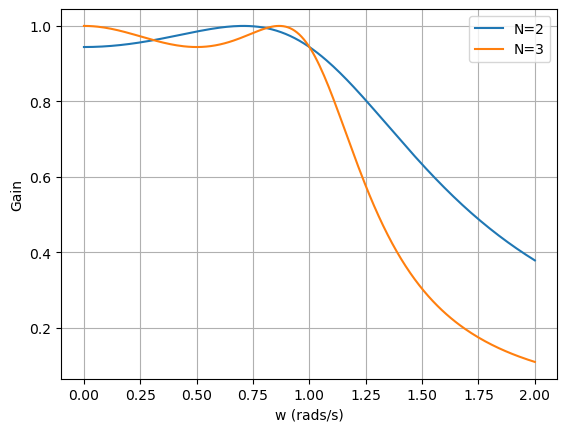

In [12]:
b1, a1 = signal.cheby1(2, 0.5, 1, analog=True)
b2, a2 = signal.cheby1(3, 0.5, 1, analog=True)

w1, h1 = signal.freqs(b1, a1, w)
w2, h2 = signal.freqs(b2, a2, w)

plt.plot(w1, np.abs(h1))
plt.plot(w2, np.abs(h2))
plt.grid()
plt.legend(['N=2', 'N=3'])
plt.xlabel('w (rads/s)')
plt.ylabel('Gain')

On note d’abord que sur la bande passante spécifiée (0 à 1 rad/sec), le gain
du filtre oscille entre 0 et –0.5 dB ( i.e. entre un gain de 1 et un gain de
0.944 à l’échelle linéaire) tel que spécifié. On note aussi que pour l’ordre
impair (ici, $N = 3$), le gain DC du filtre est exactement 1, alors que pour
l’ordre pair (ici, $N = 2$) le gain DC du filtre est exactement la plus petite
valeur permise dans la bande passante, i.e. ici 0.944 en linéaire.

Notez que dans le cas du filtre de Chebyshev d’ordre impair ($N = 3$), le
numérateur de $H(s)$ est identique au coefficient $b_0$ du dénominateur, et que
dans le cas du filtre d’ordre pair ($N = 2$), le numérateur est égal au
coefficient $b_0$ du dénominateur multiplié par $\sqrt{1/(1+\alpha^2)}$ avec $\alpha$ défini à
l’équation (43) pour un ronflement de bande passante $R$ = 0.5 dB.
Cette caractéristique de ronflement de gain dans la bande passante se
distingue de façon évidente de l’approximation de Butterworth, qui, on l’a
vu, est plate dans la bande passante. En revanche, cette oscillation de gain
du filtre de Chebyshev permet de réduire la largeur de la bande de
transition. En fait, l’approximation de Chebyshev est celle qui, pour un ordre
$N$ donné, conduit à la bande de transition la plus étroite possible. Ainsi, si le
ronflement de la bande passante rencontre les spécifications, le filtre de
Chebyshev peut être considéré comme l’approximation la plus sélective au
sens d’isoler une bande de fréquences par rapport aux autres fréquences.

Pour visualiser le gain de sélectivité des filtres Chebyshev, la figure suivante
montre, en pointillé, la caractéristique de gain d’un filtre de Butterworth
passe-bas normalisé d’ordre $N = 6$ et, en trait plein, la caractéristique de
gain d’un filtre de Chebyshev ($\alpha = 0.5$ dB) passe-bas normalisé de même
ordre. On voit tout de suite la différence sur la bande de transition. D’abord,
le filtre de Chebyshev maintient son gain « élevé » (i.e. près de 1) jusqu’à la
fin de la bande passante qui se termine ici à 1 rad/sec, ce que ne fait pas
aussi bien le filtre Butterworth. Ensuite, au-delà de la bande passante, le
gain du filtre de Chebyshev tombe plus rapidement vers zéro.

Text(0, 0.5, 'Gain')

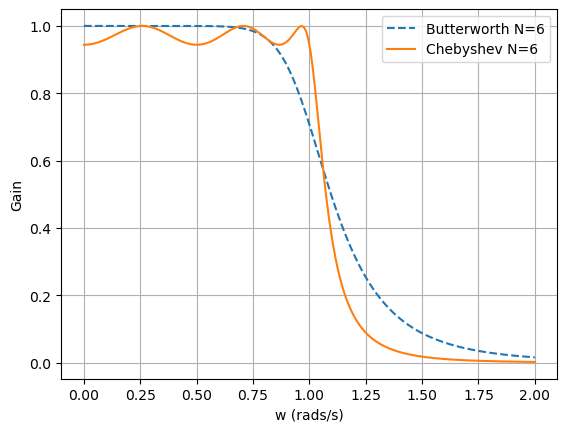

In [13]:
b1, a1 = signal.butter(6, 1, analog=True)
b2, a2 = signal.cheby1(6, 0.5, 1, analog=True)

w1, h1 = signal.freqs(b1, a1, w)
w2, h2 = signal.freqs(b2, a2, w)

plt.plot(w1, np.abs(h1), linestyle='--')
plt.plot(w2, np.abs(h2))
plt.grid()
plt.legend(['Butterworth N=6', 'Chebyshev N=6'])
plt.xlabel('w (rads/s)')
plt.ylabel('Gain')

On le voit, la différence majeure entre l’approximation de Butterworth et
l’approximation de Chebyshev est le ronflement dans la bande passante. La
position des pôles d’un filtre de Chebyshev doit donc nécessairement différer
de celle des pôles d’un filtre de Butterworth. En effet, les pôles d’un filtre de
Chebyshev sont situés sur une ellipse dans le demi-plan complexe gauche,
alors que les pôles d’un filtre de Butterworth sont situés sur un cercle. Cela a
comme effet de rapprocher de l’axe imaginaire les pôles d’un filtre de
Chebyshev comparativement aux pôles d’un filtre de Butterworth. Ce
rapprochement des pôles vers l’axe imaginaire, comme l’illustre la prochaine
figure, crée les « bosses » spectrales (le ronflement) dans la caractéristique de gain du filtre
de Chebyshev.

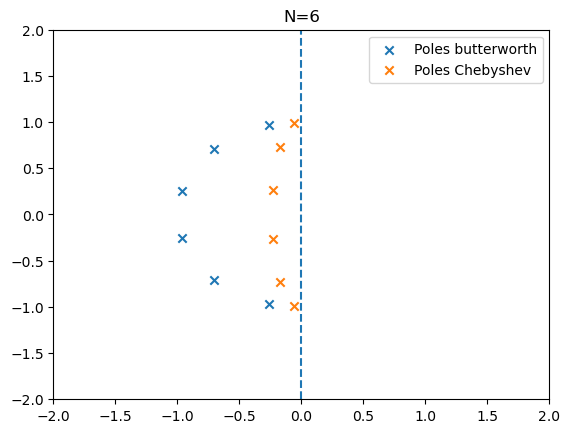

In [14]:
z, p, k = signal.cheby1(6, 1, 1, analog=True, output='zpk')

plt.scatter(np.real(p6), np.imag(p6), marker='x')
plt.scatter(np.real(p), np.imag(p), marker='x')
plt.axis([-2, 2, -2, 2])
plt.axvline(linestyle='--')
plt.title('N=6')
plt.legend(['Poles butterworth', 'Poles Chebyshev'])

### Phase des filtres de Butterworth et de Chebyshev

Jusqu’à présent, on n’a regardé que la caractéristique de gain des
approximations de Butterworth et de Chebyshev. Cependant, il peut être
important de connaître la caractéristique de phase du filtre. On sait que plus
la phase est linéaire, plus le délai de groupe est constant et plus des
fréquences adjacente seront retardées du même délai en passant à travers
le filtre. Un délai de groupe le plus constant possible signifie donc qu’un
signal dans une bande de fréquences donnée va ressortir du filtre sans trop
de distortion. Autrement, si le délai varie selon la fréquence, le rapport
temporel entre les composantes sinusoïdales du signal sera altéré et la
forme du signal sera modifiée.

La figure suivante montre la caractéristique de phase des filtres passe-bas
normalisés, d’ordre 6, Butterworth et Chebyshev ($alpha$ = 0.5).
On a aussi mis à gauche leurs caractéristiques de gain pour être plus complet. On note que pour cet
exemple, la caractéristique de phase est pire, du point de vue de la linéarité,
pour le filtre de Chebyshev que pour le filtre de Butterworth. La figure du
bas montre la caractéristique d’amplitude et de phase d’un troisième type de
filtre (aussi d’ordre 6): le filtre de Bessel. Celui-ci permet, en relaxant les
contraintes sur la caractéristique d’amplitude, d’obtenir une très bonne
linéarité de la phase. La section qui suit sera dédiée à cette troisième
approximation.

Text(0, 0.5, 'Phase(degrés)')

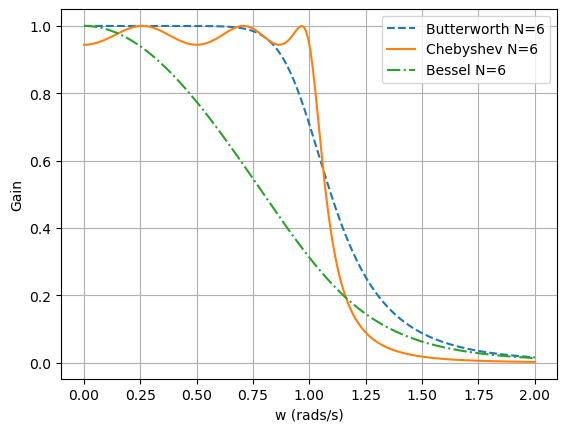

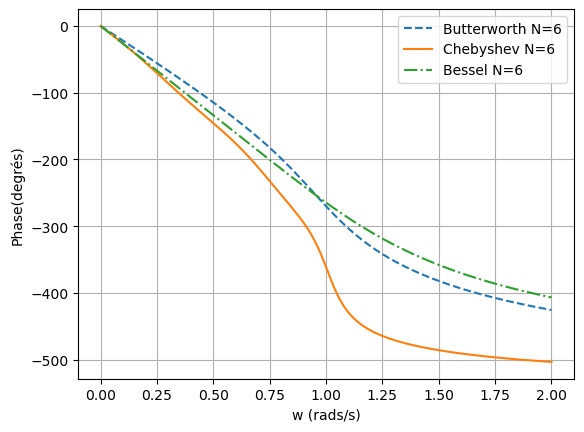

In [15]:
def angle_deg(h):
    return 180 * np.unwrap(np.angle(h)) / np.pi

b1, a1 = signal.butter(6, 1, analog=True)
b2, a2 = signal.cheby1(6, 0.5, 1, analog=True)
b3, a3 = signal.bessel(6, 1, analog=True)

w1, h1 = signal.freqs(b1, a1, w)
w2, h2 = signal.freqs(b2, a2, w)
w3, h3 = signal.freqs(b3, a3, w)

plt.plot(w1, np.abs(h1), linestyle='--')
plt.plot(w2, np.abs(h2))
plt.plot(w3, np.abs(h3), linestyle='-.')
plt.grid()
plt.legend(['Butterworth N=6', 'Chebyshev N=6', 'Bessel N=6'])
plt.xlabel('w (rads/s)')
plt.ylabel('Gain')

plt.figure()
plt.plot(w1, angle_deg(h1), linestyle='--')
plt.plot(w2, angle_deg(h2))
plt.plot(w3, angle_deg(h3), linestyle='-.')
plt.grid()
plt.legend(['Butterworth N=6', 'Chebyshev N=6', 'Bessel N=6'])
plt.xlabel('w (rads/s)')
plt.ylabel('Phase(degrés)')

### L’approximation de Bessel

La fonction de transfert d’un filtre passe-bas normalisé d’ordre $N$ de Bessel
d’ordre $N$, et dont le gain DC est 1, est donnée par

\begin{equation}
H(s) = \frac{a_0}{y_n(s)}
\label{eq:besselgen} \tag{48}
\end{equation}

où

\begin{equation}
y_N(s)=s^N+a_{N-1} s^{N-1}+a_{N-2} s^{N-2}+\ldots+a_1 s+a_0
\label{eq:besselden} \tag{49}
\end{equation}

Nous allons utiliser les conventions de `scipy` pour générer les coefficients
des filtres de Bessel. Dans cette convention, le coefficient $a_0 = 1$.

On utilise la fonction [`scipy.signal.bessel`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bessel.html) pour calculer les coefficients d’un
filtre analogique passe-bas normalisé de Bessel. La syntaxe de la fonction
`signal.bessel` est la suivante :

`b, a = signla.bessel(N, Wn, analog=True)`

où

- `N` est l'ordre du filtre
- `Wn` est la fréquence de coupure
- `analog=True` spécifie un filtre analogique

`b` et `a` sont respectivement les coefficients du
numérateur et du dénominateur de $H(s)$

Ce qu’il faut retenir de l’approximation de Bessel, c’est qu’elle vise à
produire un filtre dont la phase est la plus linéaire possible, i.e. dont le délai
de groupe est le plus constant possible. La caractéristique de gain n’est pas
aussi importante ici qu’elle ne l’est pour les filtres de Butterworth ou de
Chebyshev. Ou plus précisément, l’objectif de l’approximation de Bessel est
de satisfaire une contrainte de phase, alors que les approximation de
Chebyshev et de Butterworth visent plutôt à satisfaire une contrainte de
gain.

La figure suivante montre le délai de groupe obtenu pour des filtres de
Bessel normalisés d’ordre 2, 4, 6 et 8. Les ordres impairs (N=1, 3, 5, etc.)
sont tout aussi intéressants, mais on ne les affiche pas ici pour alléger le
graphique. Leur délai de groupe se trouverait entre les fonctions d’ordre pair
montrées ci-dessous.

Text(0, 0.5, 'Délais de groupe (s)')

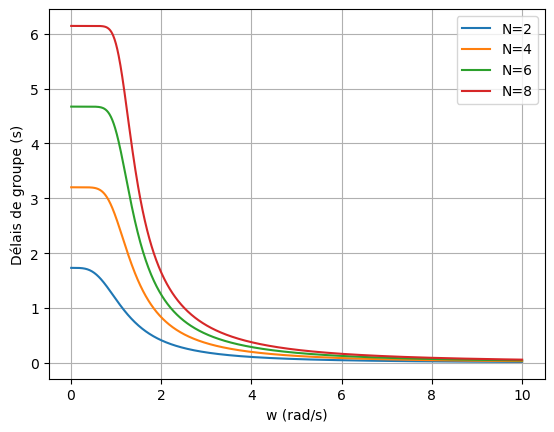

In [16]:
b1, a1 = signal.bessel(2, 1, analog=True)
b2, a2 = signal.bessel(4, 1, analog=True)
b3, a3 = signal.bessel(6, 1, analog=True)
b4, a4 = signal.bessel(8, 1, analog=True)

w = np.linspace(0, 10, 1000)

w1, h1 = signal.freqs(b1, a1, w)
w2, h2 = signal.freqs(b2, a2, w)
w3, h3 = signal.freqs(b3, a3, w)
w4, h4 = signal.freqs(b4, a4, w)

grp_delay1 = -np.diff(np.unwrap(np.angle(h1))) / np.diff(w1)
grp_delay2 = -np.diff(np.unwrap(np.angle(h2))) / np.diff(w2)
grp_delay3 = -np.diff(np.unwrap(np.angle(h3))) / np.diff(w3)
grp_delay4 = -np.diff(np.unwrap(np.angle(h4))) / np.diff(w4)

plt.plot(w[1:], grp_delay1)
plt.plot(w[1:], grp_delay2)
plt.plot(w[1:], grp_delay3)
plt.plot(w[1:], grp_delay4)
plt.legend(['N=2', 'N=4', 'N=6', 'N=8'])
plt.grid()
plt.xlabel ( 'w (rad/s)' )
plt.ylabel ('Délais de groupe (s)')

On remarque deux choses dans cette figure. Premièrement, le délai de
groupe dans la bande passante augmente avec l’ordre du filtre. Ceci est
typique de tous les filtres. Pour des filtres passe-bas normalisés, comme ceux-ci,
le délai devient très important.

Après transformation fréquentielle pour obtenir le filtre désiré, le délai de
groupe correspondant aura une valeur plus « acceptable ». Deuxièmement,
le délai de groupe tend à être de plus en plus constant dans la bande 0 à 1
rad/sec à mesure que l’ordre augmente. C’est la caractéristique principale
recherchée pour les filtres de Bessel. Ainsi, lorsque l’on va transformer ce
filtre en le dénormalisant, pour en faire un passe-bande par exemple, le
délai de groupe tendra à être constant dans la bande passante du filtre
désiré.

En choisissant une échelle logarithmique pour la fréquence, on obtient une
figure qui donne une meilleure appréciation de l’effet de l’ordre du filtre sur
la constance du délai de groupe dans la bande 0 à 1 rad/sec. Ceci est
montré à la figure suivante.

Text(0, 0.5, 'Délais de groupe (s)')

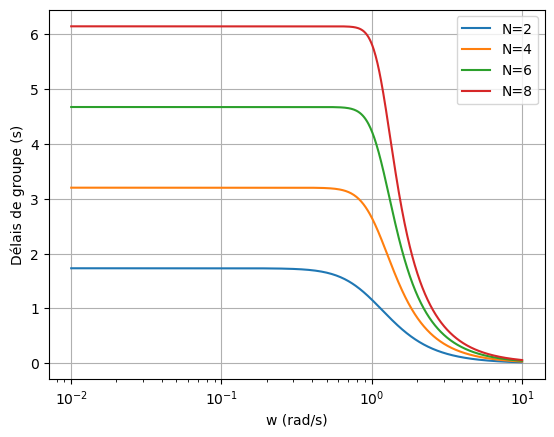

In [17]:
plt.semilogx(w[1:], grp_delay1)
plt.semilogx(w[1:], grp_delay2)
plt.semilogx(w[1:], grp_delay3)
plt.semilogx(w[1:], grp_delay4)
plt.legend(['N=2', 'N=4', 'N=6', 'N=8'])
plt.grid()
plt.xlabel ( 'w (rad/s)' )
plt.ylabel ('Délais de groupe (s)')

Pour être en mesure de comparer les différents ordres du filtre de Bessel, on
propose de normaliser le délai de groupe et d’afficher le résultat. Ceci est
illustré à la figure suivante, où la courbe de délai de groupe pour chaque
ordre est divisée par le délai maximum à cet ordre (qui se produit à la DC
pour ces passe-bas normalisés). Cette figure permet de comparer facilement
le pourcentage de variation du délai de groupe dans la bande 0 à 1 rad/sec
pour chacun des ordres. Par exemple, à l’ordre 2, le délai de groupe
normalisé varie de 1 à 0.65 environ dans la bande 0 à 1 rad/sec, alors qu’à
l’ordre 8, le délai de groupe normalisé varie de 1 à 0.95 dans la même
bande. Ainsi, on peut dire que la variation du délai de groupe est de 35%
environ à l’ordre 2 et de 5% seulement à l’ordre 8.

Finalement, on montre aussi, dans les figures suivantes, la caractéristique
de gain de ces mêmes filtres de Bessel passe-bas normalisés. On montre
d’abord le gain sur une plage de –5 à 3 dB, puis de –100 à 3 dB. On observe
que la caractéristique de gain des filtres de Bessel est moins intéressante
que celles des filtres Butterworth ou Chebyshev. Il faudra donc s’assurer
qu’elle rencontre les spécifications désirées une fois que la caractéristique de
phase aura été satisfaite. Au besoin, il faudra diminuer les contraintes sur le
délai de groupe afin de satisfaire aussi celles sur le gain.


(0.01, 10.0, -5.0, 2.0)

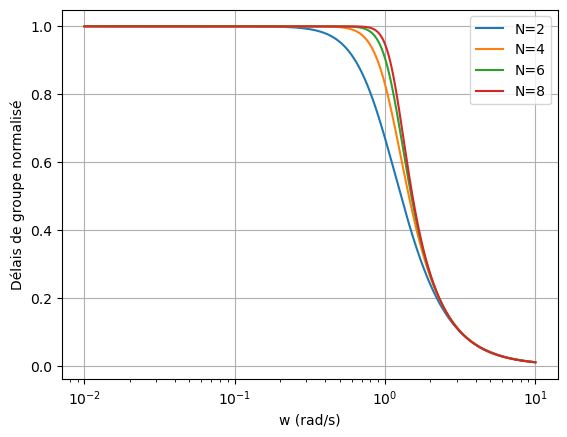

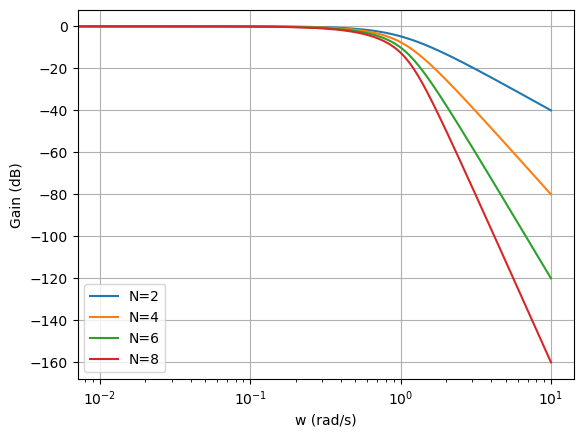

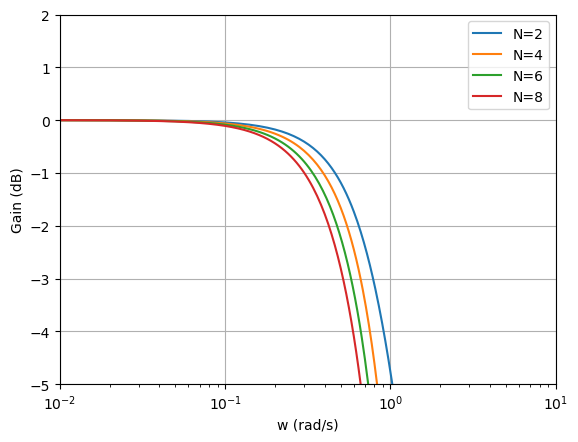

In [18]:
plt.semilogx(w[1:], grp_delay1/np.max(grp_delay1))
plt.semilogx(w[1:], grp_delay2/np.max(grp_delay2))
plt.semilogx(w[1:], grp_delay3/np.max(grp_delay3))
plt.semilogx(w[1:], grp_delay4/np.max(grp_delay4))
plt.legend(['N=2', 'N=4', 'N=6', 'N=8'])
plt.grid()
plt.xlabel ( 'w (rad/s)' )
plt.ylabel ('Délais de groupe normalisé')


plt.figure()
plt.semilogx(w, 20*np.log10(np.abs(h1)))
plt.semilogx(w, 20*np.log10(np.abs(h2)))
plt.semilogx(w, 20*np.log10(np.abs(h3)))
plt.semilogx(w, 20*np.log10(np.abs(h4)))
plt.legend(['N=2', 'N=4', 'N=6', 'N=8'])
plt.grid()
plt.xlabel ( 'w (rad/s)' )
plt.ylabel ('Gain (dB)')

plt.figure()
plt.semilogx(w, 20*np.log10(np.abs(h1)))
plt.semilogx(w, 20*np.log10(np.abs(h2)))
plt.semilogx(w, 20*np.log10(np.abs(h3)))
plt.semilogx(w, 20*np.log10(np.abs(h4)))
plt.legend(['N=2', 'N=4', 'N=6', 'N=8'])
plt.grid()
plt.xlabel ( 'w (rad/s)' )
plt.ylabel ('Gain (dB)')
plt.axis([0.01, 10, -5, 2])

On peut noter ici que le comportement des filtres de Bessel est en quelque
sorte inversé par rapport à celui des filtres de Butterworth ou de Chebyshev.
Alors que la caractéristique de gain des filtres de Butterworth et de
Chebyshev s’améliore avec l’ordre du filtre, la caractéristique de gain des
filtres de Bessel, surtout dans la bande passante, est meilleure lorsque
l’ordre est petit. En effet, à l’ordre 2, le gain du filtre de Bessel passe-bas
normalisé est d’environ -4 dB à la fréquence de 1 rad/sec, alors qu’il est de
moins de –10 dB à l’ordre 8. Pour le filtre de Bessel passe-bas normalisé, le
gain varie donc davantage dans la bande 0 à 1 rad/sec lorsque l’ordre du
filtre augmente. Par contre, la caractéristique de phase est meilleure à
mesure que l’ordre augmente.

La table ci-dessous donne les coefficients du dénominateur de la fonction de
transfert $H(s)$ des filtres de Bessel passe-bas normalisés, en ordre
décroissant de la puissance de la variable s, pour un ordre $N$ entre 2 et 8
(coefficients de l’équation (49)). Notez que le coefficient de $s^N$ vaut toujours
1, de même que le terme constant $a_0$. C’est pour cette raison que la table ne
donne pas les coefficients du dénominateur de $H(s)$ pour l’ordre $N=1$ ; ils
valent tous les deux 1.

|  <div style="width:20px">$N$</div> | <div style="width:40px">$a_7$</div> | <div style="width:40px">$a_6$</div> | <div style="width:40px">$a_5$</div> |<div style="width:40px">$a_4$</div> | <div style="width:40px">$a_3$</div> | <div style="width:40px">$a_2$</div> | <div style="width:40px">$a_1$</div> |
| --- | -------- | -------- | -------- | -------- | -------- | -------- | -------- |
| 2 |  |  |  |  |  |  | 1.7321 |
| 3 |  |  |  |  |  | 2.4329 | 2.4662 |
| 4 |  |  |  |  | 3.1239 | 4.3916 | 3.2011 |
| 5 |  |  |  | 3.8107 | 6.7767 | 6.8864 | 3.9363 |
| 6 |  |  | 4.4952 | 9.6223 | 12.3583 | 9.9202 | 4.6717 |
| 7 |  | 5.1783 | 12.9288 | 19.9255 | 20.2678 | 13.4940 | 5.4071 |
| 8 | 5.8606 | 16.6965 | 29.8993 | 36.5061 | 30.9037 | 17.6085 | 6.1427 |

Nous avons choisi d’utiliser les coefficients calculés par la fonction `scipy.signal.bessel` 
pour générer les fonctions de transfert des filtres de Bessel.
Dans la littérature, cependant, on trouvera souvent une autre définition pour ces
coefficients. Nous la donnons ici par souci d’être complet. Notez cependant
que dans cette définition alternative, il est plus difficile de comparer les
filtres de Bessel aux différents ordres, notamment parce que les
caractéristiques de délai de groupe n’ont pas de fréquence « pivot »
commune, comme dans le cas précédent.

Donc, on trouvera souvent dans la littérature la fonction de transfert d’un
filtre de Bessel passe-bas normalisé, comme étant définie par les équations
(48) et (49), où le coefficient $a_k$ est défini par l’équation suivante :

\begin{equation}
a_k=\frac{(2 N-k) !}{2^{N-k} k !(N-k) !}
\label{eq:bessellitt} \tag{50}
\end{equation}

Par exemple, en appliquant les équations (48) à (50), les fonctions de
transfert des filtres de Bessel passe-bas normalisés d’ordre $N$ = 1, 2 et 3
sont les suivantes :

A l’ordre N=1 :
\begin{equation}
H(s) = \frac{1}{s+1}
\label{eq:besselN1} \tag{51}
\end{equation}

A l’ordre N=2 :
\begin{equation}
H(s) = \frac{3}{s^2 + 3s + 3}
\label{eq:besselN2} \tag{52}
\end{equation}

A l’ordre N=3 :
\begin{equation}
H(s) = \frac{15}{s^2 + 6s^2 +15s + 15}
\label{eq:besselN3} \tag{53}
\end{equation}

Comme aucune contrainte de gain n’est donnée pour concevoir les filtres de
Bessel, il est normal que le gain soit plus difficile à « prévoir » pour les
fréquences d’intérêt. On laisse au lecteur le loisir d’afficher la carte des pôles
des filtres de Bessel normalisés définis pour différents ordres $N$ dans cette
section, et de la comparer aux filtres de Butterworth et de Chebyshev.

### Réponses transitoires

On a analysé jusqu’ici les réponses fréquentielles des filtres étudiés. Il est
cependant utile de les caractériser aussi dans le domaine temporel en
étudiant leur réponse à des signaux particuliers. La réponse à l’échelon et la
réponse impulsionnelle contiennent l’essentiel de l’information temporelle
requise. En effet, la réponse à l’échelon détermine la durée de la période
transitoire lorsque le filtre réagit à un changement brusque dans le signal
d’entrée. La réponse impulsionnelle, comme on l’a vu précédemment,
contient toute l’information pour obtenir le signal de sortie par convolution
avec le signal d’entrée.

On peut utiliser Python pour obtenir la réponse à l’échelon et la réponse
impulsionnelle d’un circuit décrit par sa fonction de transfert. Les fonctions
requises sont

[`scipy.signal.step`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.step.html)

[`scipy.signal.impulse`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.impulse.html)

On prend ici un exemple avec l’ordre $N=6$ pour chacun des trois types de
filtres passe-bas étudiés jusqu’ici (Butterworth, Chebyshev ($\alpha$ = 0.5) et
Bessel). Au besoin, on pourra utiliser Python de la même façon pour obtenir
les réponses temporelles de filtres avec un autre ordre $N$, ou même pour
d’autres types de filtres (passe-haut, passe-bande, etc.)



Text(0.5, 0, 't (s)')

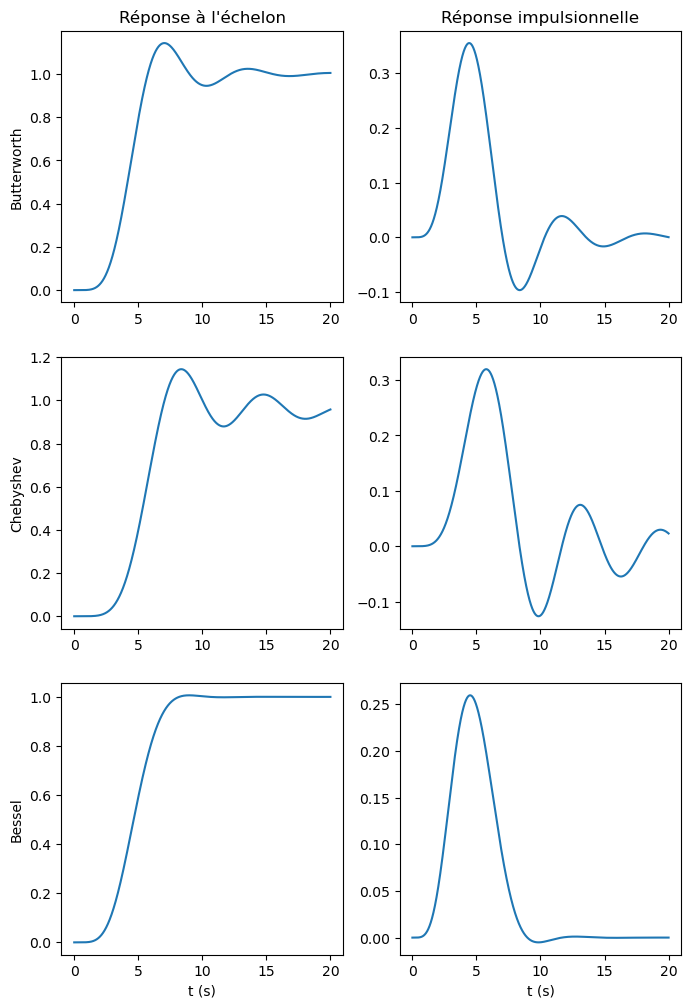

In [19]:
N = 6
wn = 1
R = 0.5

b1, a1 = signal.butter(N, wn, analog=True)
b2, a2 = signal.cheby1(N, R, wn,analog=True)
b3, a3 = signal.bessel(N, wn, analog=True)

t = np.linspace(0,20,20000)

t1, s1 = signal.step((b1, a1), T=t)
t2, s2 = signal.step((b2, a2), T=t)
t3, s3 = signal.step((b3, a3), T=t)

t1, h1 = signal.impulse((b1, a1), T=t)
t2, h2 = signal.impulse((b2, a2), T=t)
t3, h3 = signal.impulse((b3, a3), T=t)

fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(12)

ax = plt.subplot(3, 2, 1)
ax.plot(t1, s1)
ax.set_ylabel('Butterworth')
ax.set_title('Réponse à l\'échelon')

ax = plt.subplot(3, 2, 2)
ax.plot(t1, h1)
ax.set_title('Réponse impulsionnelle')

ax = plt.subplot(3, 2, 3)
ax.plot(t2, s2)
ax.set_ylabel('Chebyshev')

ax = plt.subplot(3, 2, 4)
ax.plot(t2, h2)

ax = plt.subplot(3, 2, 5)
ax.plot(t3, s3)
ax.set_ylabel('Bessel')
ax.set_xlabel('t (s)')

ax = plt.subplot(3, 2, 6)
ax.plot(t3, h3)
ax.set_xlabel('t (s)')


On observe ici l’effet de la linéarité de phase du filtre de Bessel, qui déforme
moins les signaux dans sa bande passante que les autres approximations.
Cela se voit en particulier sur la réponse à l’échelon. Puisque le spectre de
l’échelon est concentré dans les basses fréquences (le spectre de l’échelon
est surtout concentré en basse-fréquences, rappelez-vous vos notions
d’analyse de Fourier…), on s’attend à obtenir les mêmes composantes
fréquentielles en sortie du filtre passe-bas. Si en plus le filtre est à phase
linéaire (délai de groupe constant), ces composantes fréquentielles ne seront
pas décalées les unes par rapport aux autres. C’est ce que montre la
réponse à l’échelon du filtre de Bessel qui est moins déformée que celle des
autres filtres. Sa forme arrondie vient simplement du fait que le filtre coupe
quand même certaines fréquences, puisque c’est un passe-bas.

Notez que la réponse temporelle des filtres de Butterworth et de Chebyshev
oscille davantage que celle du filtre de Bessel. Puisque la phase de ces filtres
est moins linéaire, les composantes fréquentielles qui se retrouvent à la
sortie du filtre sont plus décalées les unes par rapport aux autres, ce qui
modifie davantage la forme du signal.